## Imports
There are just a few imports for this analysis, but this version will deviate from the Soccermatics approach due to the mplsoccer library throwing and error when making a call to Statsbomb.  Instead, the statsbomb data will be called directly for the dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch
from statsbombpy import sb

## Opening the dataset
Using the sb parser in place of SBopen in mplsoccer the event data is pulled out. Calling on the event level data and inputting the id of the game as a parameter loads the game data. The event data is stored in a dataframe df. From this dataframe take out the names of the two teams. Then, filter the dataframe so that only shots are left in the events.

In [2]:
# get event data
event_lib = sb.events(match_id=69301, split=True, flatten_attrs=False)
event_lib.keys()

dict_keys(['starting_xis', 'half_starts', 'passes', 'ball_receipts', 'carrys', 'pressures', 'ball_recoverys', 'clearances', 'blocks', 'dispossesseds', 'duels', 'dribbled_pasts', 'dribbles', 'interceptions', 'goal_keepers', 'miscontrols', 'foul_committeds', 'foul_wons', 'injury_stoppages', 'errors', 'shots', 'substitutions', 'half_ends', 'tactical_shifts', 'bad_behaviours'])

In [3]:
shots = event_lib['shots']
shots.iloc[0]['shot']['outcome']['name']

'Goal'

In [4]:
#get team names
team1, team2 = shots.possession_team.unique()
print(team1, team2)

Sweden Women's England Women's


In [5]:
shots_id = (shots.set_index('id'))

## Making the shot map - iterative solution
Draw the pitch using the MPL Soccer class

In this example, set variables for pitch length and width to the Statsbomb coordinate system (yards). Read more details about [different pitch coordinate systems here](https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_setup/plot_compare_pitches.html).

1. After drawing the pitch, iterate through all the shots in the match. 
2. Take the x and y coordinates, the team name and if a goal was scored. 
3. If It was scored, plot a solid circle with the name of the player, if not, plot a transculent circle (parameter alpha tunes the transcluency). 
4. To place England’s shots on one half and Sweden's shots on the other half, subtract x (and y?) from the pitch length and height.

**Note:** Football data tends to be attacking left to right, and we will use this as default in the course.

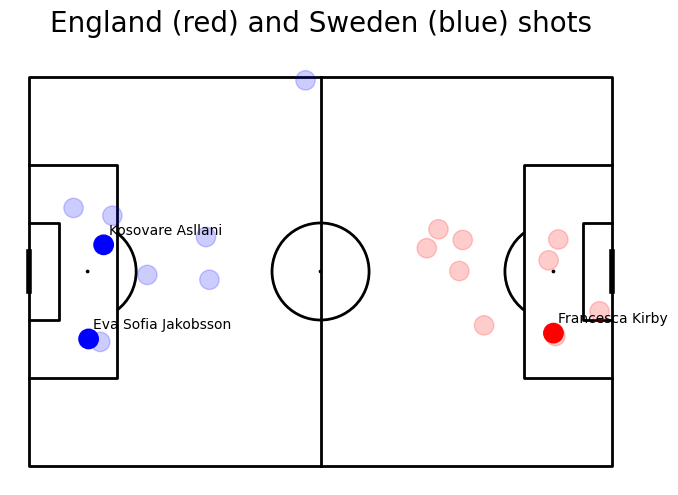

In [6]:
# Plotting tends to create large cells, but will attempt to refractor original where possible
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 5))

#Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80

#Plot the shots by looping through them.
for i,shot in shots_id.iterrows():
    # get shot information from first record or library of shot information
    x=shot.location[0]
    y=shot.location[1]
    goal=shot.shot['outcome']['name']=='Goal' # library freeze frame
    team_name=shot['possession_team']
    
    #set circlesize
    circleSize=2
    
    #plot England
    if (team_name==team2):
        if goal:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            plt.text(x+1,y-2,shot['player'])
        else:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            shotCircle.set_alpha(.2)
    #plot Sweden
    else:
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")
            plt.text(pitchLengthX-x+1,pitchWidthY - y - 2 ,shot['player'])
        else:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
#set title
fig.suptitle("England (red) and Sweden (blue) shots", fontsize = 20)
fig.set_size_inches(10, 5)
plt.show()

## MLPSoccer Pitch Class
The pitch class from MLPSoccer allows data captured from the events of a soccer match to be readily drawn to recreate the action on the pitch.  While this has been demonstrated already above, another example or two would help to continue demonstrating the capability and options available within this class for rendering soccer actions.

### Loading data again
In this instance the data will be loaded in wide format, meaning the player actions during the event will not be collapsed into a dictionary of information stashed in a column.  Here the hierachical index for shot data is collapsed so that all the entries associated with the shot columns begin with 'shot'.  Pulling the shot data again, along with outcome, location and player name, the same mapping will be reproduced using a another solution.

In [7]:
eng_swe_game = sb.events(match_id=69301)
eng_swe_game.head(2)

,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4141, 'lineup': [{'player': {'id...",England Women's,865,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Sweden Women's,858,00:00:00.000,Starting XI,NaN


In [8]:
eng_swe_game.columns

Index(['bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_recovery_failure', 'block_deflection',
       'block_save_block', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_other', 'clearance_right_foot', 'counterpress',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_offensive', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_shot_saved_to_post', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera', 'out',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 

In [9]:
eng_swe_shots = (eng_swe_game
 .loc[lambda df: df.type == 'Shot']
 .loc[:,['player','location','shot_outcome','shot_end_location','team']]
 .assign(x = lambda df: df.location.apply(pd.Series)[0],
         y = lambda df: df.location.apply(pd.Series)[1])
)
eng_swe_shots

,player,location,shot_outcome,shot_end_location,team,x,y
3259,Kosovare Asllani,"[104.7, 45.5]",Goal,"[120.0, 43.6, 0.2]",Sweden Women's,104.7,45.5
3260,Eva Sofia Jakobsson,"[110.9, 53.1]",Saved to Post,"[118.4, 44.2, 0.7]",Sweden Women's,110.9,53.1
3261,Eva Sofia Jakobsson,"[107.8, 26.1]",Goal,"[120.0, 43.9, 1.0]",Sweden Women's,107.8,26.1
3262,Lucy Bronze,"[93.7, 51.1]",Saved,"[118.8, 43.9, 0.4]",England Women's,93.7,51.1
3263,Francesca Kirby,"[108.0, 52.7]",Goal,"[120.0, 36.1, 0.3]",England Women's,108.0,52.7
3264,Hanna Erica Maria Glas,"[83.6, 47.1]",Saved,"[117.5, 42.8, 0.5]",Sweden Women's,83.6,47.1
3265,Emma Stina Blackstenius,"[105.4, 25.5]",Off T,"[120.0, 41.1, 4.6]",Sweden Women's,105.4,25.5
3266,Ellen White,"[108.4, 53.3]",Saved,"[113.9, 46.9, 0.5]",England Women's,108.4,53.3
3267,Alex Greenwood,"[84.3, 31.3]",Blocked,"[103.3, 32.8]",England Women's,84.3,31.3
3268,Jade Moore,"[81.9, 35.2]",Off T,"[120.0, 34.2, 0.6]",England Women's,81.9,35.2


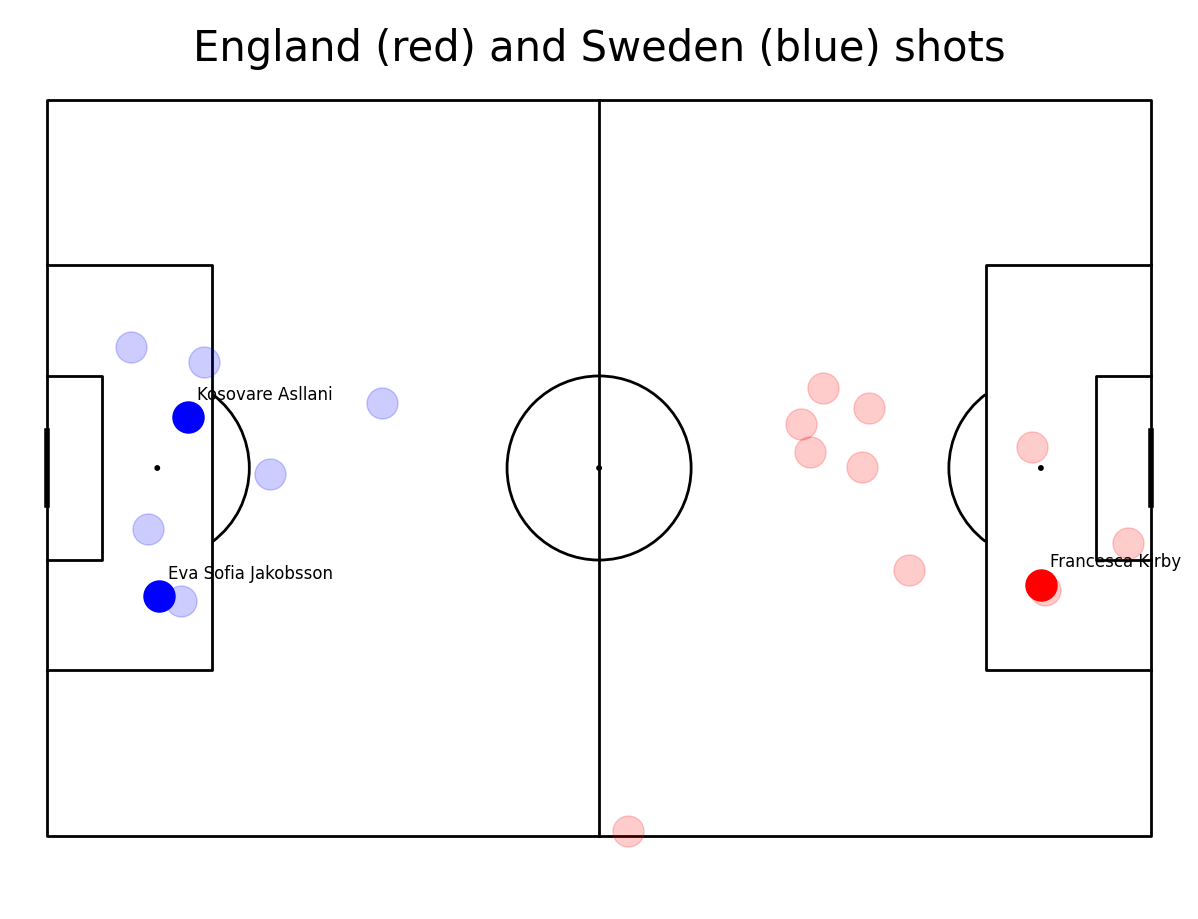

In [10]:
pitch = Pitch(line_color='black')
fig,ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

df_england = (eng_swe_shots
              .loc[lambda df: df.team == team2, ['x', 'y', 'shot_outcome', "player"]]
             )

#plot - if shot ended with Goal - alpha 1 and add name

#for England
for i, row in df_england.iterrows():
    if row["shot_outcome"] == 'Goal':
    #make circle
       pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'])
       pitch.annotate(row["player"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(row.x, row.y, alpha = 0.2, s = 500, color = "red", ax=ax['pitch'])

df_sweden = (eng_swe_shots
             .loc[lambda df: df.team== team1, ['x', 'y', 'shot_outcome', "player"]]
            )

#for Sweden we need to revert coordinates
for i, row in df_sweden.iterrows():
    if row["shot_outcome"] == 'Goal':
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 1, s = 500, color = "blue", ax=ax['pitch'])
       pitch.annotate(row["player"], (120 - row.x + 1, 80 - row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])

fig.suptitle("England (red) and Sweden (blue) shots", fontsize = 30)
plt.show()

### Attempting to Recreate
In an effort to better understand the options within MLPSoccer and using the statsbomb data, this will be an attempt to refactor the approach to plotting shots.  Here the target was to reduce the syntax and leverage vectorized non for loop approaches where possible,

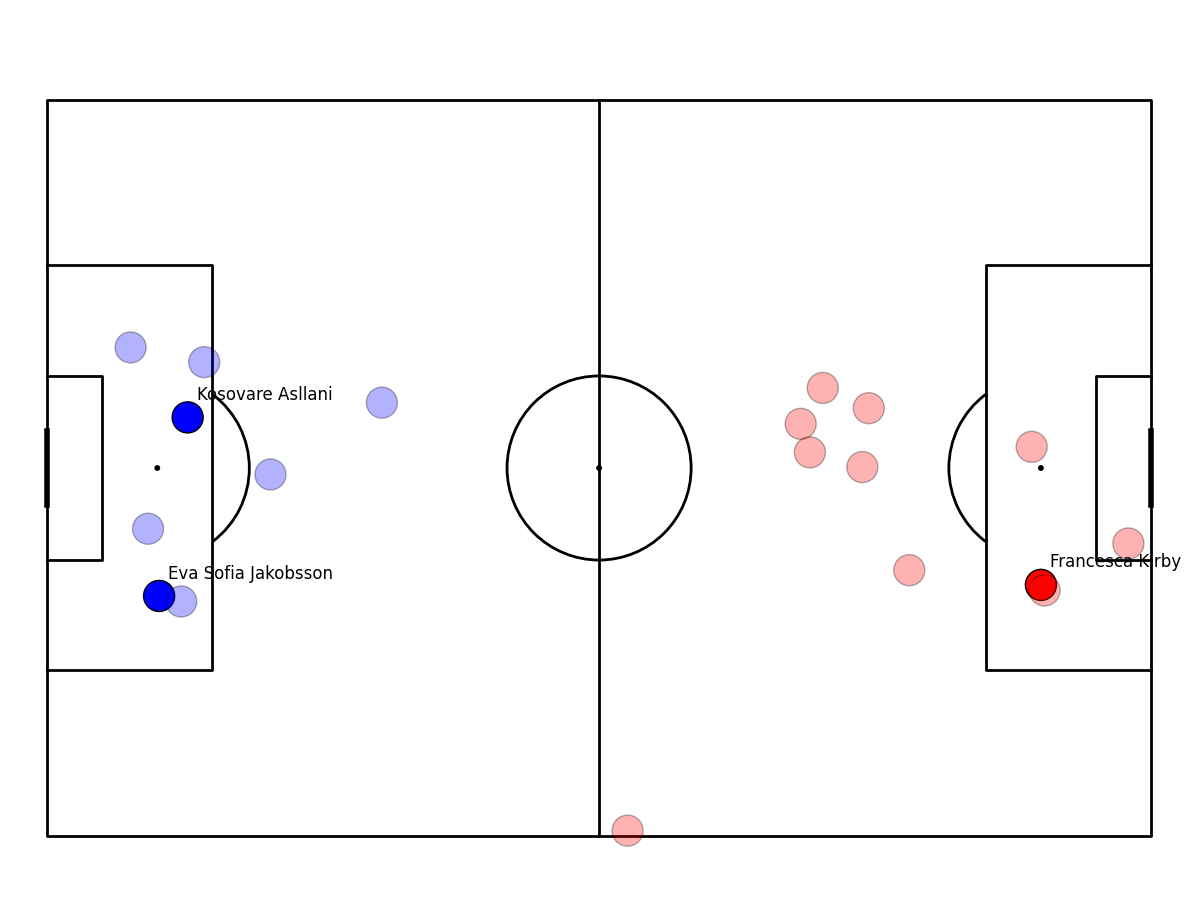

In [11]:
pitch = Pitch(line_color='black')
fig,ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

shots = eng_swe_shots

#plot - if shot ended with Goal - alpha 1 and add name

pitch.scatter(x=np.where(shots.team.str.startswith('Eng'),shots.x, 120-shots.x),
              y=np.where(shots.team.str.startswith('Eng'),shots.y, 80-shots.y),  
              alpha = np.where(shots.shot_outcome=='Goal',1,0.3),
              c=np.where(shots.team.str.startswith('Eng'),'r','b'), 
              s=500, edgecolor='k', ax=ax['pitch'])

# annotate points in axis
for idx, row in shots.iterrows():
    if row.shot_outcome =='Goal':
        pitch.annotate(row.player,
                       (np.where(row.team.startswith('Eng'),row.x+1,120-row.x+1),
                        np.where(row.team.startswith('Eng'),row.y-2, 80-row.y-2)),
                       ax=ax['pitch'], fontsize = 12)

plt.show()

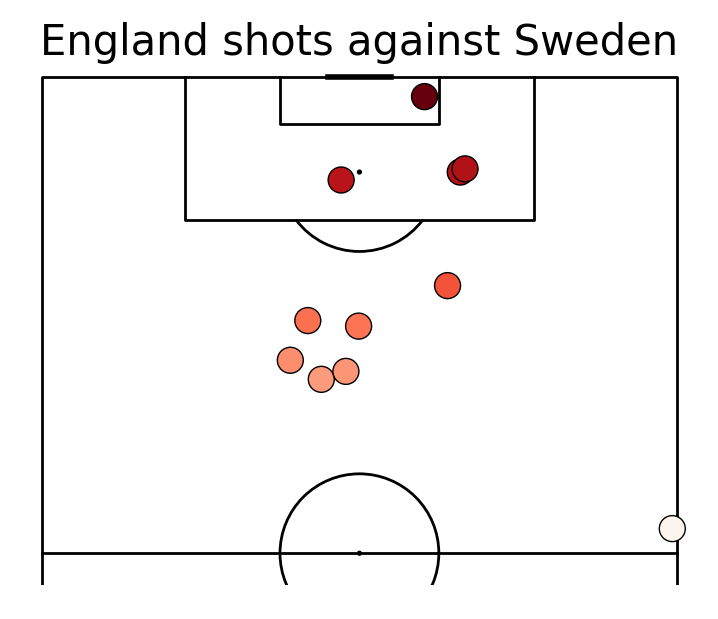

In [12]:
pitch = VerticalPitch(line_color='black', half = True)
fig, ax = pitch.grid(figheight=6,grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#plotting all shots
pitch.scatter(df_england.x, df_england.y, alpha = 1, s = 350, c = df_england.x, cmap='Reds', ax=ax['pitch'], edgecolors="black")
fig.suptitle("England shots against Sweden", fontsize = 30)
plt.show()

### Challenge
1. Create a dataframe of passes which contains all the passes in the match
2. Plot the start point of every Sweden pass. Attacking left to right.
3. Plot only passes made by Caroline Seger (she is Sara Caroline Seger in the database)
4. Plot arrows to show where the passes went to.

In [31]:
swe_pass = (eng_swe_game
 .query('type == "Pass"')
 .query('team.str.startswith("Swed")')
 .query('~pass_recipient.isna()')
#  .loc[:,lambda df: df.columns.str.startswith('pass')].T
 .loc[:,['player','location','pass_outcome','pass_length','pass_angle','pass_end_location']]
 .query('pass_outcome.isna()')
 .assign(x_st = lambda df: df.location.apply(pd.Series)[0],
         x_fn = lambda df: df.pass_end_location.apply(pd.Series)[0],
         y_st = lambda df: df.location.apply(pd.Series)[1],
         y_fn = lambda df: df.pass_end_location.apply(pd.Series)[1])
)

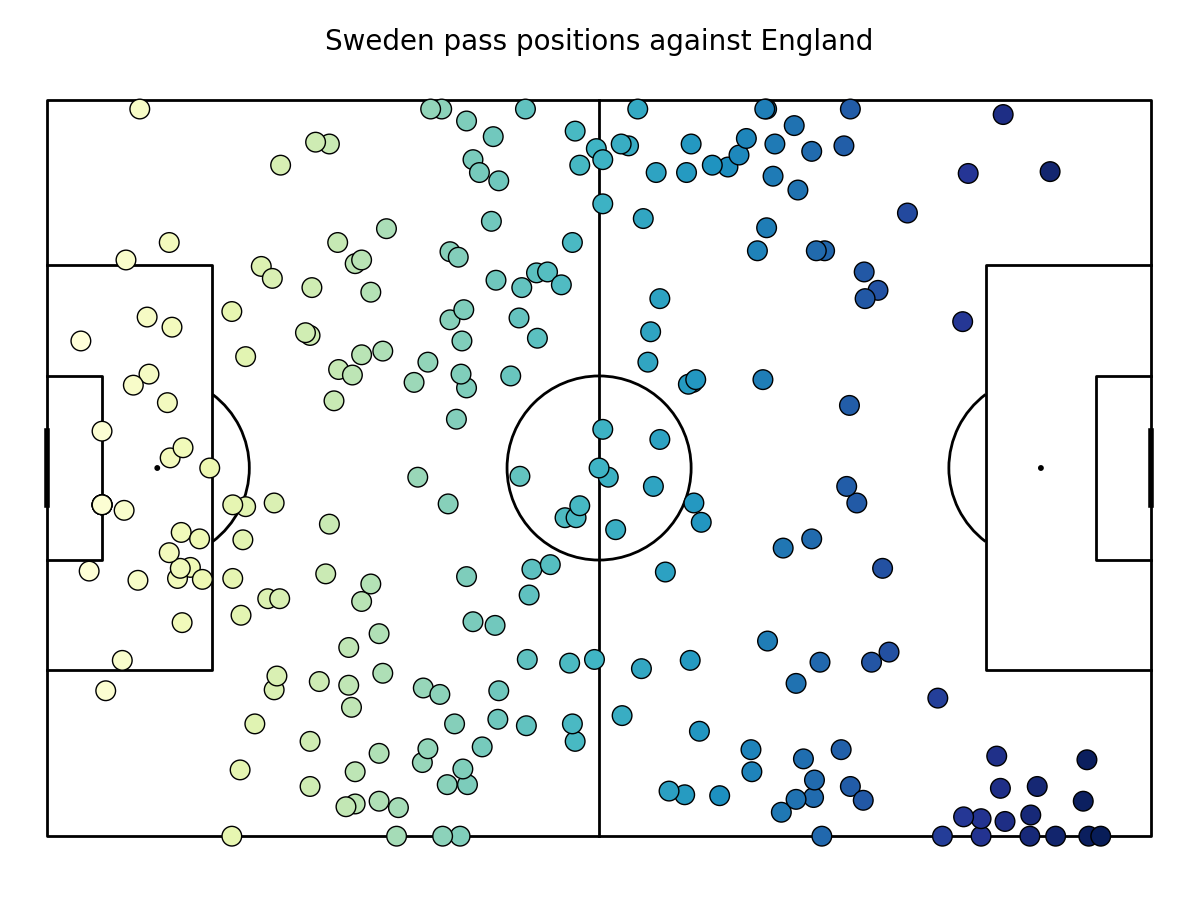

In [48]:
pitch = Pitch(line_color='black')
fig,ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

#plot - Start point for all Swed passes

pitch.scatter(x=swe_pass.x_st, y=swe_pass.y_st, 
              c=swe_pass.x_st, cmap='YlGnBu', s=200, edgecolor='k', ax=ax['pitch'])
fig.suptitle("Sweden pass positions against England", fontsize = 20)
plt.show()

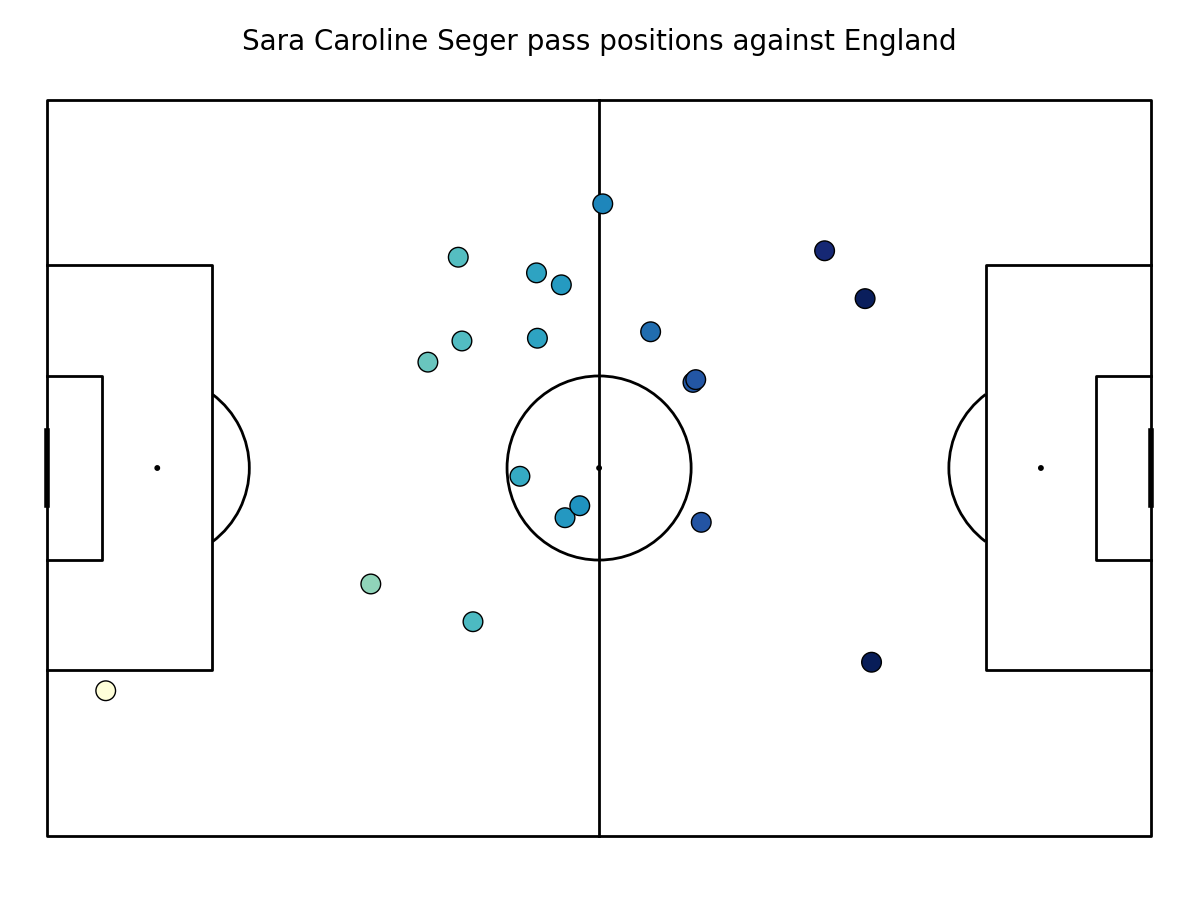

In [49]:
pitch = Pitch(line_color='black')
fig,ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

#plot - Start point for all Swed passes
caro_pass = swe_pass.query('player=="Sara Caroline Seger"')

pitch.scatter(x=caro_pass.x_st, y=caro_pass.y_st, 
              c=caro_pass.x_st, cmap='YlGnBu', s=200, edgecolor='k', ax=ax['pitch'])

fig.suptitle("Sara Caroline Seger pass positions against England", fontsize = 20)
plt.show()

In [58]:
caro_pass

,player,location,pass_outcome,pass_length,pass_angle,pass_end_location,x_st,x_fn,y_st,y_fn
97,Sara Caroline Seger,"[70.2, 30.7]",NaN,30.120424,-0.979110,"[87.0, 5.7]",70.2,87.0,30.7,5.7
127,Sara Caroline Seger,"[53.2, 18.8]",NaN,15.057224,0.691337,"[64.8, 28.4]",53.2,64.8,18.8,28.4
138,Sara Caroline Seger,"[89.6, 61.1]",NaN,11.933985,1.646283,"[88.7, 73.0]",89.6,88.7,61.1,73.0
159,Sara Caroline Seger,"[84.5, 16.4]",NaN,10.076706,-0.869705,"[91.0, 8.7]",84.5,91.0,16.4,8.7
165,Sara Caroline Seger,"[71.1, 45.9]",NaN,12.244999,-2.111216,"[64.8, 35.4]",71.1,64.8,45.9,35.4
169,Sara Caroline Seger,"[88.9, 21.6]",NaN,15.175309,-1.722945,"[86.6, 6.6]",88.9,86.6,21.6,6.6
191,Sara Caroline Seger,"[60.4, 11.3]",NaN,10.781466,-2.434979,"[52.2, 4.3]",60.4,52.2,11.3,4.3
427,Sara Caroline Seger,"[56.3, 45.4]",NaN,29.261750,2.203362,"[39.0, 69.0]",56.3,39.0,45.4,69.0
430,Sara Caroline Seger,"[35.2, 52.6]",NaN,22.466196,2.072274,"[24.4, 72.3]",35.2,24.4,52.6,72.3
495,Sara Caroline Seger,"[55.9, 20.1]",NaN,6.029925,0.099669,"[61.9, 20.7]",55.9,61.9,20.1,20.7


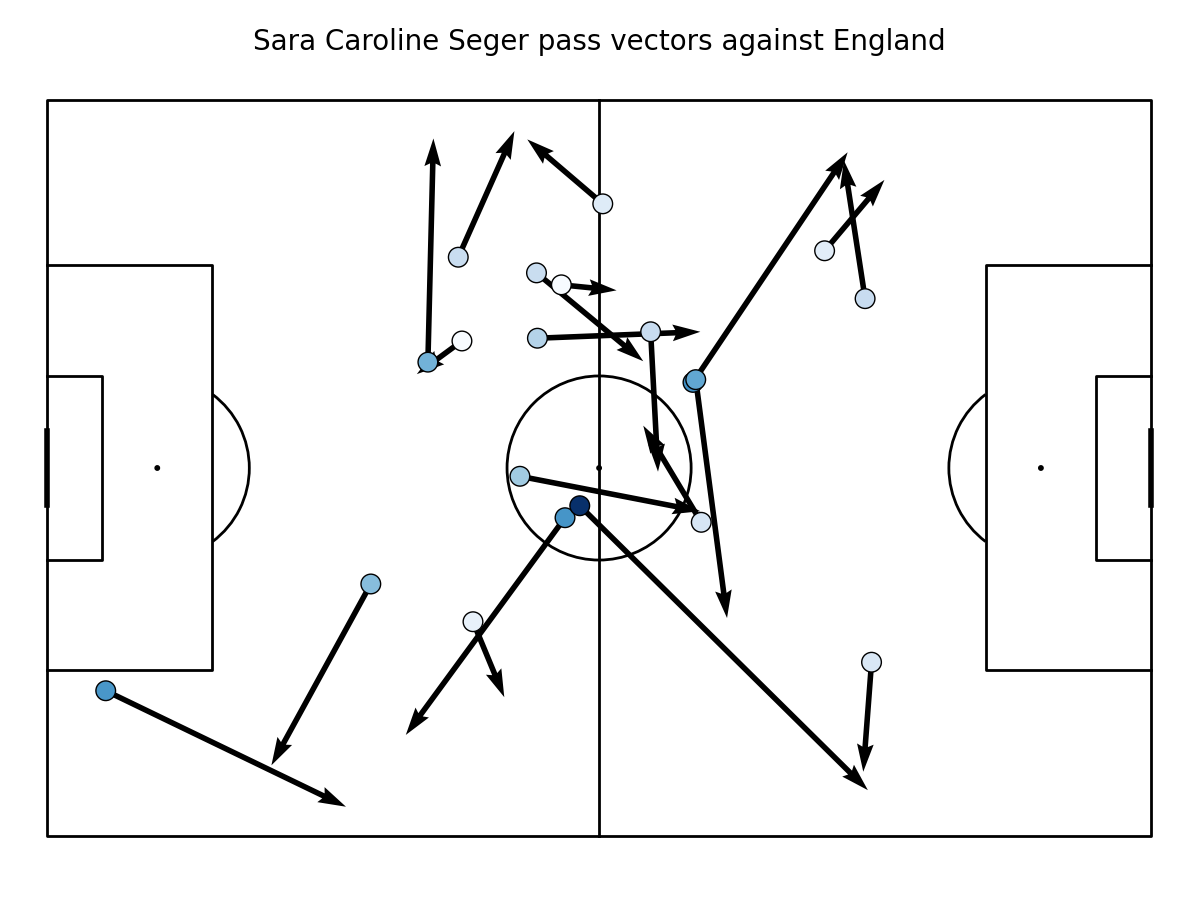

In [63]:
pitch = Pitch(line_color='black')
fig,ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

#plot - Start point for all Swed passes
caro_pass = swe_pass.query('player=="Sara Caroline Seger"')

pitch.arrows(xstart=caro_pass.x_st,ystart=caro_pass.y_st,xend=caro_pass.x_fn,yend=caro_pass.y_fn, ax=ax['pitch'])
pitch.scatter(x=caro_pass.x_st, y=caro_pass.y_st, 
              c=caro_pass.pass_length, cmap='Blues', s=200, edgecolor='k', ax=ax['pitch'])

fig.suptitle("Sara Caroline Seger pass vectors against England", fontsize = 20)
plt.show()